In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
#Load the magnitude list
mag_band = open('/content/mag k.txt')
mag_k = [float(i.strip()) for i in mag_band.readlines()]
mag = mag_k #magnitude in K

In [ ]:
#making a function to estimate the photon counts and 48 pixel for pairwise case  SNR

def SNR(wl, tau, sig_r, n_rp, alpha, Res, B_A, T_A, T_c, n_pix, v0, piston_rms, tot, v1, mag):

  def n_star(n_space, mag, SR0, D, D_oc, tau, n_tele, wl, wl0, Tr):
    delta_wl =  wl/Res #micron
    n_star_list = []
    SR =  SR0**((wl0/wl)**2)
    #print(SR)
    for i in range (len(mag)):
        #n_star_list.append(np.pi * n_space[i] * Tr[i] * ((D/2)**2-(D_oc/2)**2) * SR[i] * tau * delta_λ[i] * (10**(-0.4 * 0))) corresponds to vega's magnitude
        n_star_list.append((np.pi * n_space * Tr * ((D/2)**2-(D_oc/2)**2) * SR * tau * delta_wl * (10**(-0.4 * np.array(mag[i])))/(n_tele-1))) #for the case of all-in-one, put n_tele = 2
    return n_star_list
    #n_star_val = n_star(n_space, mag, SR0, D, D_oc, tau, n_tele, wl, wl0)


  delta_wl = wl/Res #micron
  n_thermal = tau*delta_wl*(((B_A*(1-T_A))/(n_tele-1))+(n_pix*B_A*(1-T_c))) #number of thermal background photons from the environment and the instrument
  n_frame = tot/tau #No. of frames
  Vis = v0*v1*np.exp(-((((2*np.pi*piston_rms)/wl)**2)/2)) #visibility measured on fringe tracking target
  #print(Vis)

  SNR_list = []
  for i in range (len(mag)):
    con_val = Vis*(np.array(n_star(n_space, mag, SR0, D, D_oc, tau, n_tele, wl, wl0, Tr)[i]))
    #print(np.shape(con_val))
    #a = (n_tele*alpha*np.array(n_star_val[i]))#all-in-one case
    a = (2*alpha*np.array(n_star(n_space, mag, SR0, D, D_oc, tau, n_tele, wl, wl0, Tr)[i]))#pair wise case
    b = n_thermal+(n_pix*sig_r**2)
    c = (n_pix*n_rp)
    std_flux_val = np.sqrt(a+b+c)
    error_val = std_flux_val/(np.sqrt(n_frame)*con_val)
    SNR_list.append((1/(np.sqrt(2)*np.array(error_val))))
  return SNR_list

No. of telescope: 4
Wavelength(micron): 1.26
No. of photon counts outside atm (ph /s /micron /cm^2): 0.456e6
Transmission: 0.02
Diameter of telescope(cm): 800
Central obscuration(cm): 80
Reference wavelength(micron): 2.2
Resolution: 300
Strehl Ratio at the reference wavelength : 0.6
Number of pixels used for the measurement(per spectral channel): 8
Transmission of the cooled optics: 0.5
No. background photons per spatial filter angle per s per µm at ambient temperature: 10.5e3
Transmission of the optics at ambient temperature: 0.04
Source visibility: 1
Instrument visibility: .8
Piston jitter(micron): 0.1
Total Observing time(sec): 14400
Read out noise: 30
Detector thermal noise(per sec per pixel): 600
Noise amplification factor: 1.5


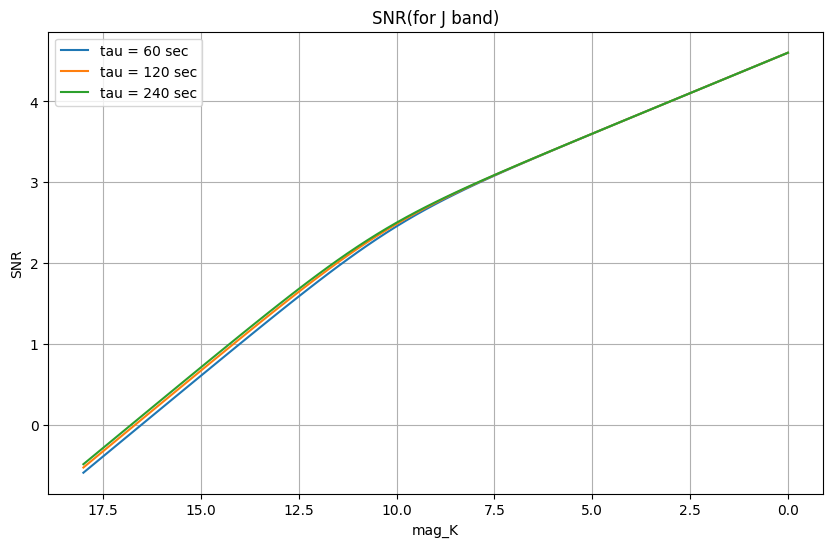

In [ ]:
#####################################################################################################################################################################

#Define the parameters
#corresponding to each band there will be one value for each parameters

n_tele = float(input("No. of telescope: "))#4
wl = float(input("Wavelength(micron): "))#[1.25, 1.65, 2.2] # in micron[J, H, K]
n_space = float(input("No. of photon counts outside atm (ph /s /micron /cm^2): "))#0.456e6
Tr = float(input("Transmission: "))#[0.02, 0.03, 0.04]#corresponds to J, H and K bands
D = float(input("Diameter of telescope(cm): "))#800 #in cm
D_oc = float(input("Central obscuration(cm): "))#80 in cm #10% central obscuration
#tau = float(input("Integration time per frame(sec): ")) #60 #sec
wl0 = float(input("Reference wavelength(micron): "))#2.2 #micron (K band)
Res = float(input("Resolution: "))#300
SR0 = float(input("Strehl Ratio at the reference wavelength : ")) #0.6
n_pix = float(input("Number of pixels used for the measurement(per spectral channel): "))#8 #per spetral channel
T_c = float(input("Transmission of the cooled optics: "))#0.5 #transmission of the cooled optics
B_A = float(input("No. background photons per spatial filter angle per s per µm at ambient temperature: "))#[0, 4, 10.5e3]
T_A = float(input("Transmission of the optics at ambient temperature: "))#[0.04, 0.06, 0.08]#J, H, K
v0 = float(input("Source visibility: "))#1
v1 = float(input("Instrument visibility: "))#0.8
piston_rms = float(input("Piston jitter(micron): ")) #0.1 #micron
tot = float(input("Total Observing time(sec): "))#14400 #sec
sig_r = float(input("Read out noise: "))#30
n_rp = float(input("Detector thermal noise(per sec per pixel): "))#600 per sec per pixel
alpha = float(input("Noise amplification factor: "))#1.5

####################################################################################################################################################################


SNR_cal1 = SNR(wl, 60, sig_r, n_rp, alpha, Res, B_A, T_A, T_c, n_pix, v0, piston_rms, tot, v1, mag) #per spectral channel per observation
SNR_cal2 = SNR(wl, 120, sig_r, n_rp, alpha, Res, B_A, T_A, T_c, n_pix, v0, piston_rms, tot, v1, mag) #per spectral channel per observation
SNR_cal3 = SNR(wl, 240, sig_r, n_rp, alpha, Res, B_A, T_A, T_c, n_pix, v0, piston_rms, tot, v1, mag) #per spectral channel per observation
#snr_log = np.log10(SNR_cal)
#print(np.shape(snr_log))
#print(np.shape(SNR_cal))

#Plotting SNR as a function of magnitude
plt.figure(figsize=(10, 6))
plt.plot(mag, np.log10(SNR_cal1), label='tau = 60 sec')
plt.plot(mag, np.log10(SNR_cal2), label='tau = 120 sec')
plt.plot(mag, np.log10(SNR_cal3), label='tau = 240 sec')
#plt.yscale('log')
plt.xlabel('mag_K')
plt.ylabel('SNR')
#plt.ylim(0, 1e)
#plt.xlim(0, 18)
plt.title('SNR(for J band)')
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
0